In [62]:
# libraries to build algorithm
import numpy as np
# libraries to import data
from sklearn.datasets import make_regression
# libraries for plotting
from matplotlib import pyplot as plt
# libraries for in-built algorithm
import statsmodels.api as sm

## Helper functions

In [66]:
# plotting functions
def plot_data(X, y):
    plt.scatter(X, y)
    plt.show()
    
def plot_regression(X, y, y_pred):
    plt.scatter(X, y)
    plt.plot(X, y_pred)
    plt.show()

## Algorithm

In [56]:
class SimpleLinearRegression():
        
    def fit(self, X, y):
        '''input:
        X: (n, 1)
        y: (n, 1)'''
        # fit a line of equation y = mx + c by minimizing the sum of squared residuals by setting to zero the partial derivatives of the loss wrt m and c
        y = y.reshape(y.shape[0], 1)
        X_bar = np.mean(X)
        y_bar = np.mean(y)
        x_resid = X - X_bar # shape = (n, 1)
        y_resid = y - y_bar # shape = (n, 1)
        Sxy = np.sum(x_resid * y_resid) # n*Cov(x,y), numerator of m
        Sxx = np.sum(x_resid**2) # n*Var(x), denominator of m
        m = Sxy / Sxx
        c = y_bar - m * X_bar
        self.coef = m
        self.intercept = c
        
    def predict(self, X_pred):
        '''input:
        X: (k, 1)'''
        return self.intercept + self.coef * X_pred # (k, 1)

## Load data

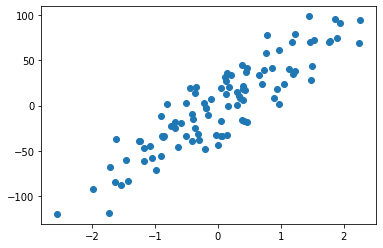

In [28]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias = 0, noise = 20, random_state=0)
plot_data(X, y)

In [57]:
X.shape, y.shape

((100, 1), (100,))

## Apply algorithm

In [58]:
reg = SimpleLinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

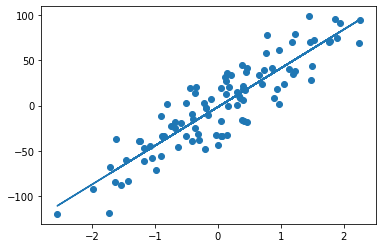

In [59]:
plot_regression(X, y, y_pred)

In [60]:
print('m: {}, c: {}'.format(reg.coef, reg.intercept))

m: 42.853355726915936, c: -1.6283636540614532


## Compare with in-built algorithm

In [65]:
X_copy = X.copy()
X_copy = sm.add_constant(X_copy)
reg2 = sm.OLS(y, X_copy).fit()
y_pred2 = reg2.predict(X_copy)

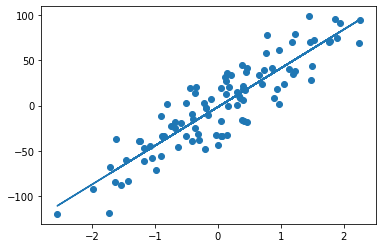

In [68]:
plot_regression(X, y, y_pred2)

In [71]:
print('m: {}, c: {}'.format(reg2.params[1], reg2.params[0]))

m: 42.85335572691593, c: -1.628363654061453
